In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score

In [2]:
iris = datasets.load_iris()


X = iris['data']
Y = iris['target']

print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [3]:
def rand_index(true,pred):
    i,j,cnt=0,0,0
    leng = len(true)
    tot = leng*(leng-1)/2 
    for i in range(len(true)):
        for j in range(i+1,len(true)):
            
            if true[i] == true[j] and pred[i] == pred[j]:
                cnt+=1
            elif true[i] != true[j] and pred[i] != pred[j]:
                cnt+=1
            #print(i,j)    
    if tot == 0:
        return 0
    
    return (cnt/tot)        
 
#example    
rand_index([0,0,0,0],[1,1,1,0])    

0.5

## `K-Means for a data contains 3 blobs` ##

(1500, 3)


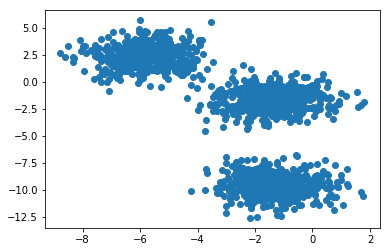

In [4]:
from sklearn.datasets.samples_generator import make_blobs

n=1500
x1, y1 = make_blobs(n_samples = n, centers= 3, n_features = 3,random_state = 2)
plt.scatter(x1[:,0], x1[:,1])

print(x1.shape)

adj rand index 0.9940100120253627
rand index 0.997339559706471


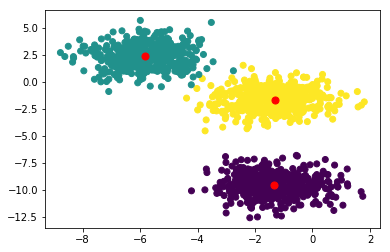

In [5]:
k_means = KMeans(n_clusters = 3,n_init = 10,random_state = 0).fit(x1)

plt.scatter(x1[:, 0], x1[:, 1],c = k_means.labels_)

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 50, c = 'red')

print('adj rand index',adjusted_rand_score(y1,k_means.labels_))
print('rand index',rand_index(y1,k_means.labels_))

## `K-Means On Iris Dataset` ##

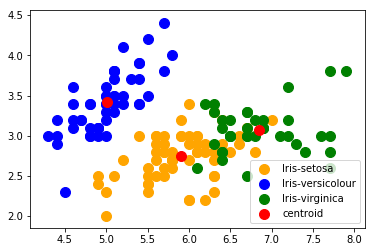

In [6]:
k_means= KMeans(n_clusters = 3,n_init = 10,random_state = 1).fit(X)

plt.scatter(X[k_means.labels_ == 0, 0], X[k_means.labels_ == 0, 1],s = 100,c = 'orange',label = 'Iris-setosa')

plt.scatter(X[k_means.labels_ == 1, 0], X[k_means.labels_ == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')

plt.scatter(X[k_means.labels_ == 2, 0], X[k_means.labels_ == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')


plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 100, c = 'red',label = 'centroid')


plt.legend()

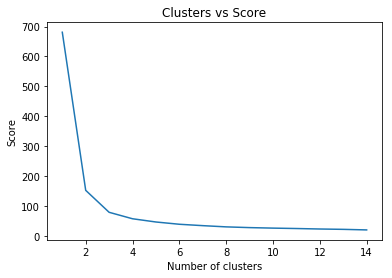

adj rand index 0.2977409393791647
rand index 0.7482774049217003


In [7]:
dist = []

for i in range(1,15):
    k_means= KMeans(n_clusters = i,n_init = 10,random_state = 1).fit(X)
    
    dist.append(k_means.inertia_)

plt.plot(range(1,15),dist)    
plt.title('Clusters vs Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score') #within cluster sum of squares
plt.show()
print('adj rand index',adjusted_rand_score(Y,k_means.labels_))
print('rand index',rand_index(Y,k_means.labels_))

## AgglomerativeClustering on Iris Dataset Using sklearn ##

In [8]:
from sklearn.cluster import AgglomerativeClustering

In [9]:
Ag_cl = AgglomerativeClustering(n_clusters=3,linkage='ward').fit(X)


ARI - ward linkage : 0.7311985567707745
rand index - ward linkage : 0.8797315436241611


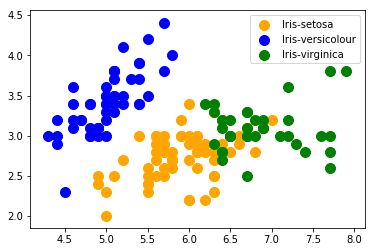

In [10]:
plt.scatter(X[Ag_cl.labels_ == 0, 0], X[Ag_cl.labels_ == 0, 1],s = 100,c = 'orange',label = 'Iris-setosa')

plt.scatter(X[Ag_cl.labels_ == 1, 0], X[Ag_cl.labels_ == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')

plt.scatter(X[Ag_cl.labels_ == 2, 0], X[Ag_cl.labels_ == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')


#plt.scatter(Ag_cl.cluster_centers_[:, 0], Ag_cl.cluster_centers_[:, 1], s = 100, c = 'red',label = 'centroid')


plt.legend()
print('ARI - ward linkage :',adjusted_rand_score(Y,Ag_cl.labels_))

print('rand index - ward linkage :',rand_index(Y,Ag_cl.labels_))

In [11]:
Ag_cl = AgglomerativeClustering(n_clusters=3,linkage='complete').fit(X)

ARI - complete linkage : 0.64225125183629
rand index - complete linkage : 0.8367785234899329


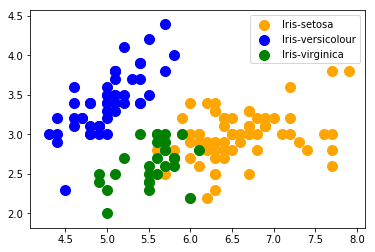

In [12]:
plt.scatter(X[Ag_cl.labels_ == 0, 0], X[Ag_cl.labels_ == 0, 1],s = 100,c = 'orange',label = 'Iris-setosa')

plt.scatter(X[Ag_cl.labels_ == 1, 0], X[Ag_cl.labels_ == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')

plt.scatter(X[Ag_cl.labels_ == 2, 0], X[Ag_cl.labels_ == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')


#plt.scatter(Ag_cl.cluster_centers_[:, 0], Ag_cl.cluster_centers_[:, 1], s = 100, c = 'red',label = 'centroid')


plt.legend()

print('ARI - complete linkage :',adjusted_rand_score(Y,Ag_cl.labels_))
print('rand index - complete linkage :',rand_index(Y,Ag_cl.labels_))

In [13]:
Ag_cl = AgglomerativeClustering(n_clusters=3,linkage='average').fit(X)

ARI - average linkage : 0.7591987071071522
rand index - average linkage : 0.8922595078299776


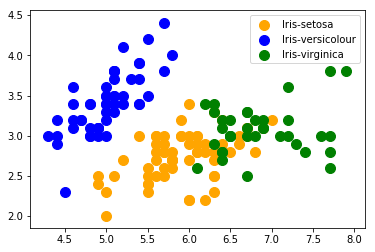

In [14]:
plt.scatter(X[Ag_cl.labels_ == 0, 0], X[Ag_cl.labels_ == 0, 1],s = 100,c = 'orange',label = 'Iris-setosa')

plt.scatter(X[Ag_cl.labels_ == 1, 0], X[Ag_cl.labels_ == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')

plt.scatter(X[Ag_cl.labels_ == 2, 0], X[Ag_cl.labels_ == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')


#plt.scatter(Ag_cl.cluster_centers_[:, 0], Ag_cl.cluster_centers_[:, 1], s = 100, c = 'red',label = 'centroid')


plt.legend()

print('ARI - average linkage :',adjusted_rand_score(Y,Ag_cl.labels_))
print('rand index - average linkage :',rand_index(Y,Ag_cl.labels_))

## AgglomerativeClustering on Iris Dataset Using scipy ##

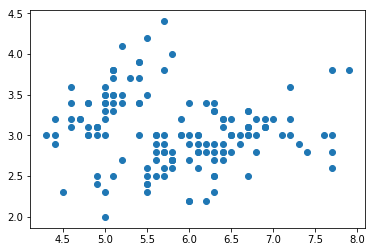

In [15]:
plt.scatter(X[:,0], X[:,1])
plt.show()
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster


def hierachy_clustering(Z,X,last,k,linkage):
    
    c, coph_dists = cophenet(Z, pdist(X))
    
    print('Cophenetic Correlation Coefficient : ',c)
    
    plt.title('Hierarchical Clustering Dendrogram (truncated)')
    
    plt.xlabel('index')
    
    plt.ylabel('distance')
    
    dendrogram(Z,truncate_mode='lastp',p=last, show_leaf_counts=True, leaf_rotation=90.,leaf_font_size=12.,show_contracted=True,)
    
    plt.show()
    
    
    y_mean = fcluster(Z, k, criterion='maxclust')

    print(y_mean)
    
    plt.scatter(X[y_mean == 1, 0], X[y_mean == 1, 1],s = 100,c = 'orange',label = 'Iris-setosa')

    plt.scatter(X[y_mean == 2, 0], X[y_mean == 2, 1], s = 100, c = 'blue', label = 'Iris-versicolour')

    plt.scatter(X[y_mean == 3, 0], X[y_mean == 3, 1], s = 100, c = 'green', label = 'Iris-virginica')

    plt.legend()
    
    link = ['ward','single','average','complete'] 
    
    print('ARI - ',link[linkage] ,'linkage :',adjusted_rand_score(Y,y_mean))
    
    print('rand index', link[linkage] ,'linkage :',rand_index(Y,y_mean))
    
    return y_mean


## Ward Linkage

In [16]:
Z = linkage(X, 'ward')

Text(0,0.5,'distance')

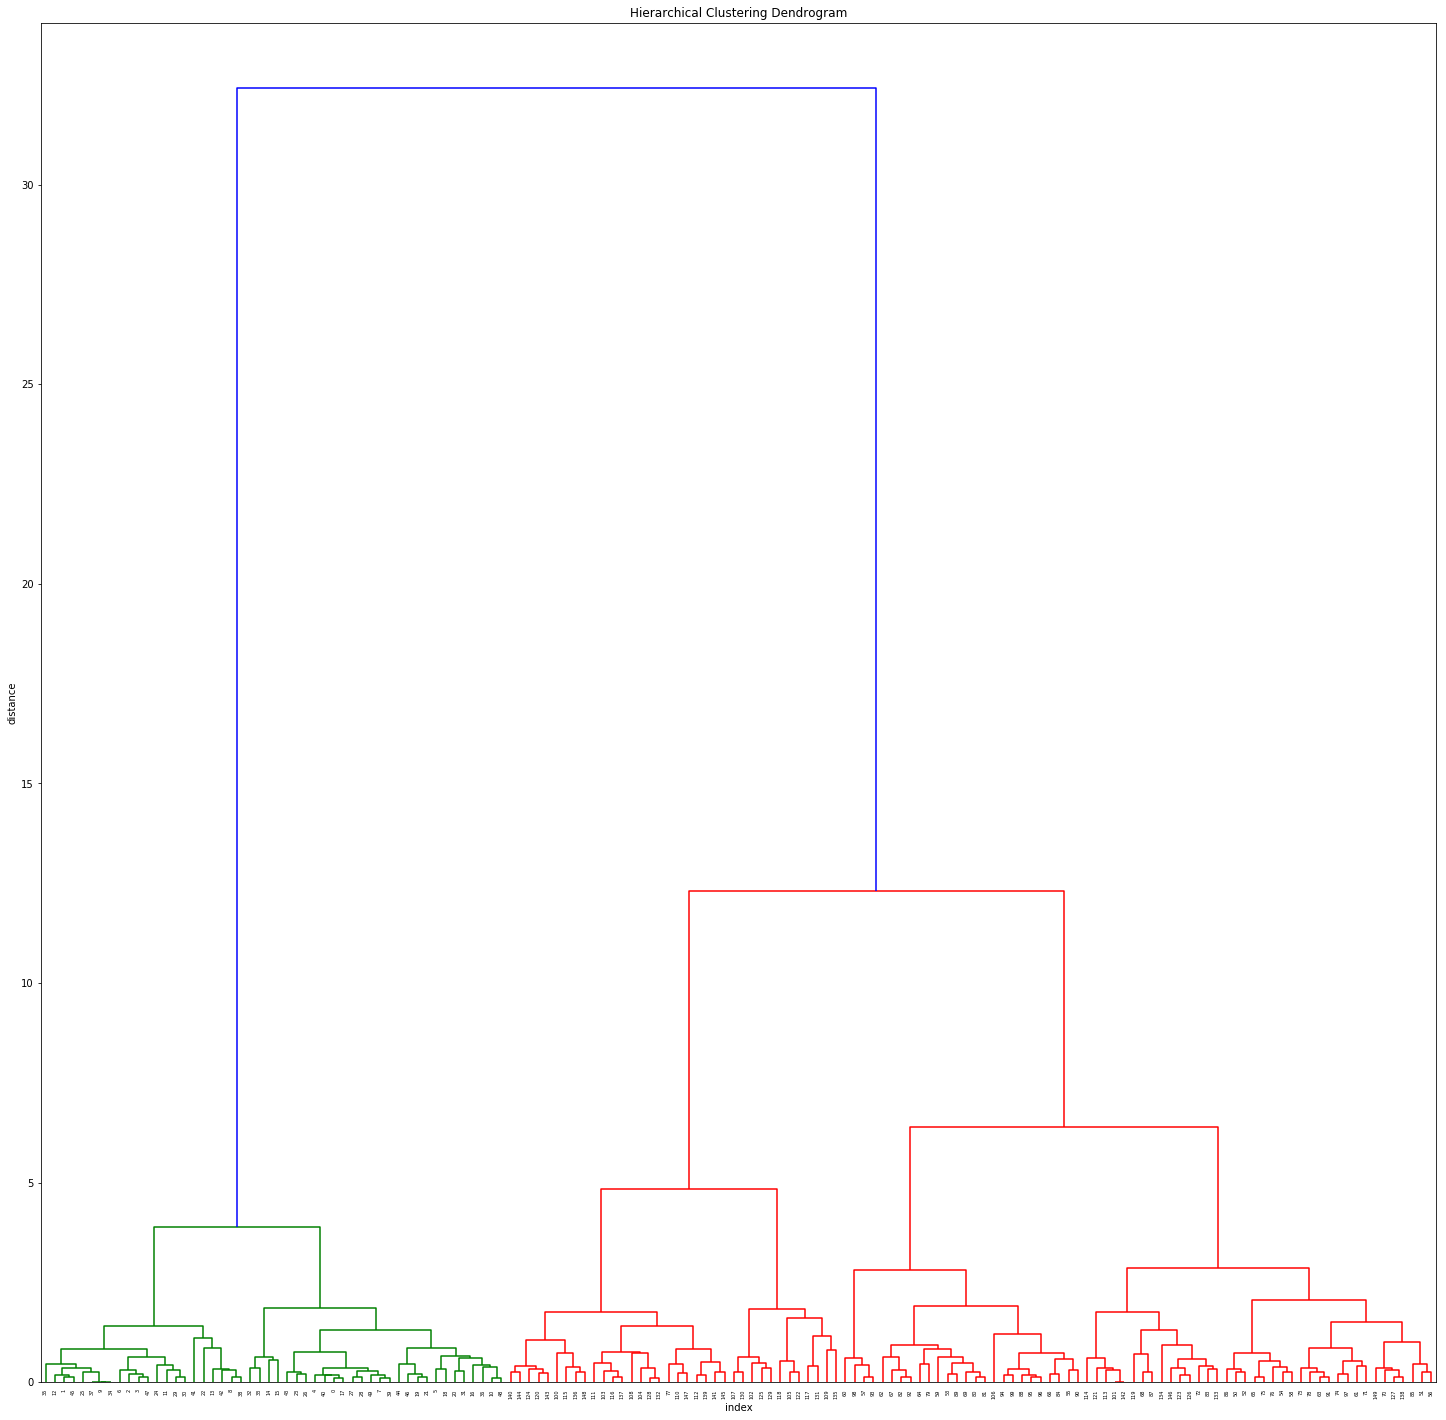

In [17]:
fig = plt.figure(figsize=(25, 25))
dn = dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')

Cophenetic Correlation Coefficient :  0.8726015250644704


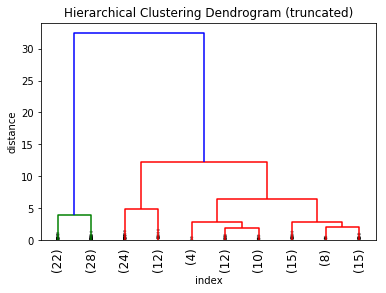

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
 2 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 3 2 2 2 3 2 2 2 3 2 2 2 3 2
 2 3]
ARI -  ward linkage : 0.7311985567707745
rand index ward linkage : 0.8797315436241611


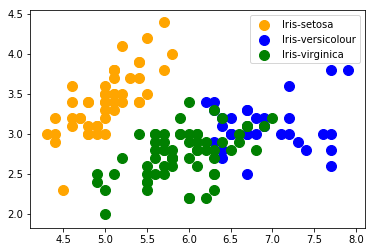

In [18]:
y_mean = hierachy_clustering(Z,X,10,3,0)

## Single Linkage ##

Text(0,0.5,'distance')

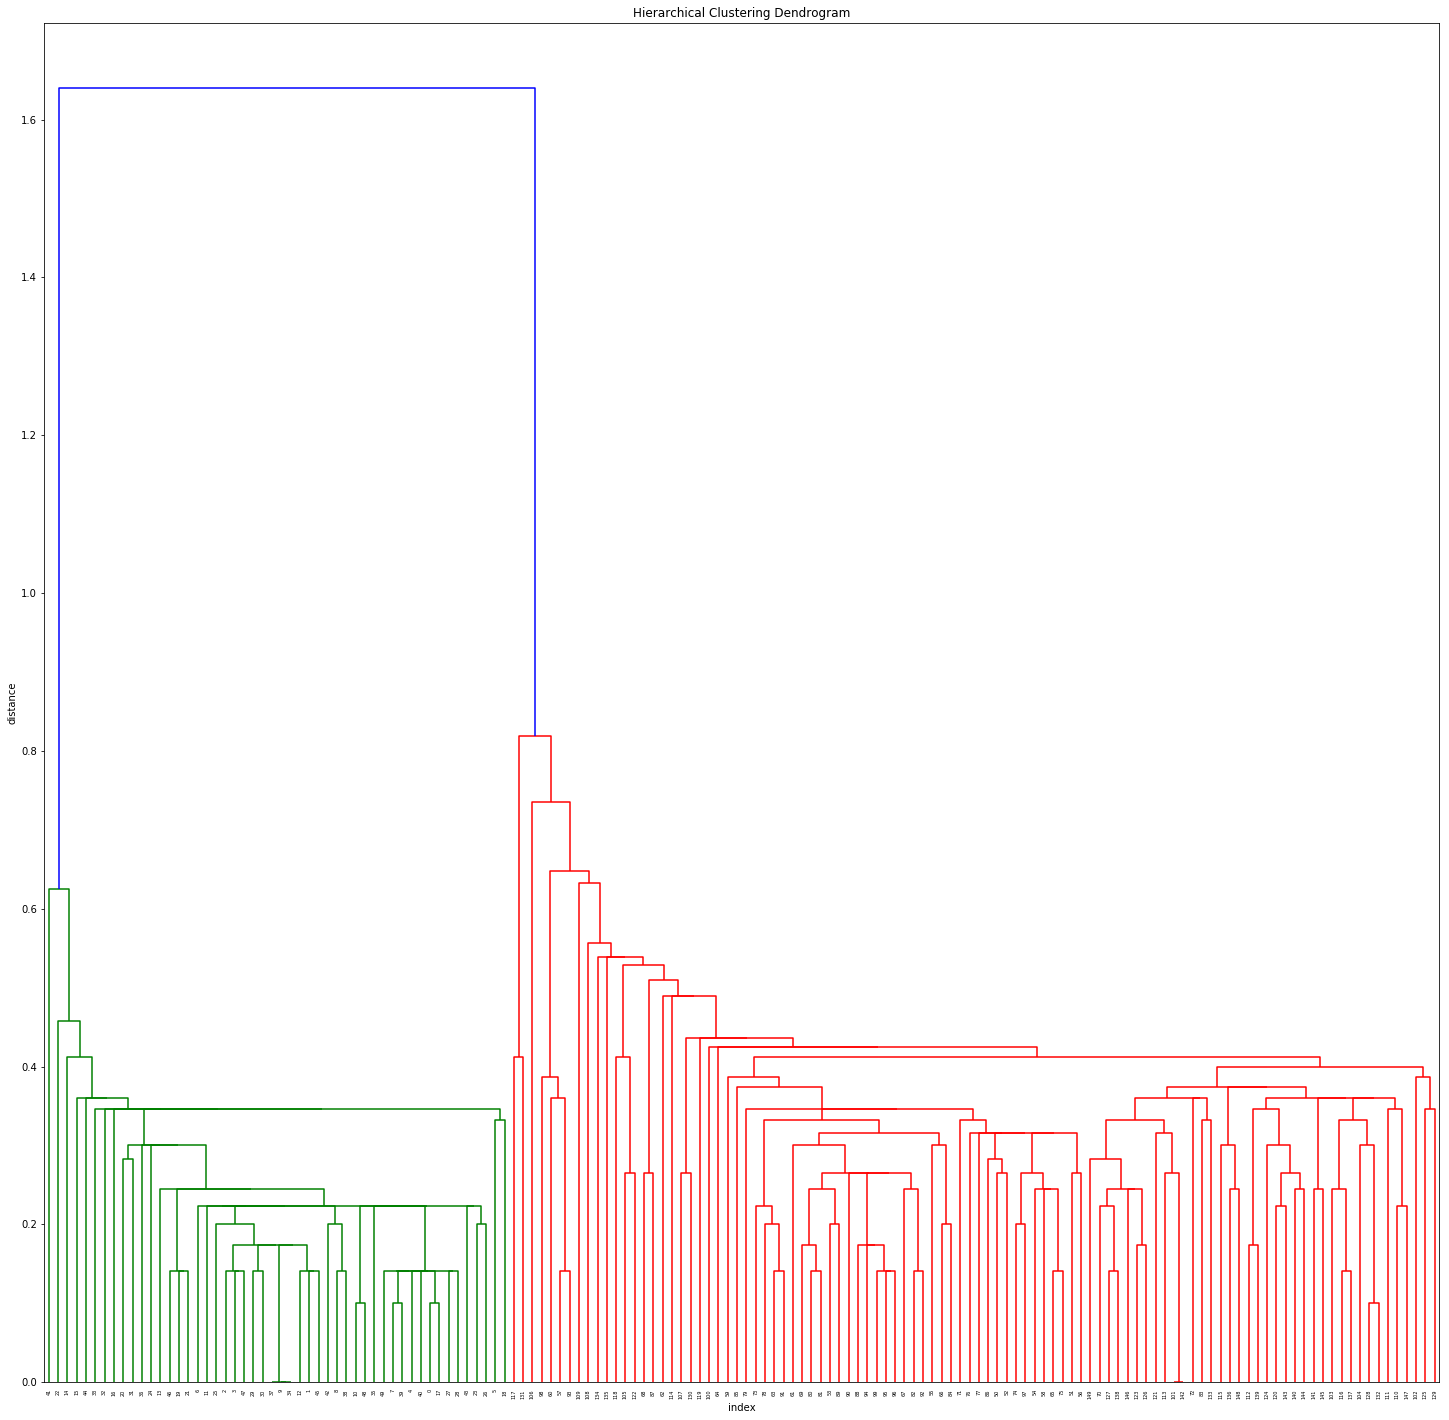

In [19]:
Z = linkage(X, 'single')
fig = plt.figure(figsize=(25, 25))
dn = dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')

Cophenetic Correlation Coefficient :  0.8635724403600693


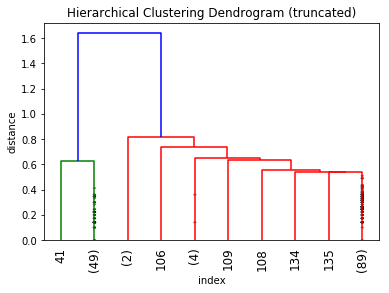

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]
ARI -  single linkage : 0.5637510205230709
rand index single linkage : 0.7766442953020134


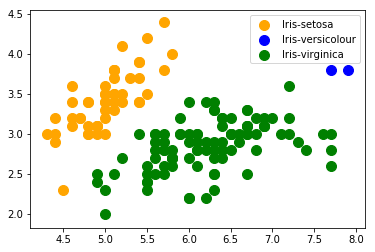

In [20]:
y_mean = hierachy_clustering(Z,X,10,3,1)

## Complete Linkage ##

Text(0,0.5,'distance')

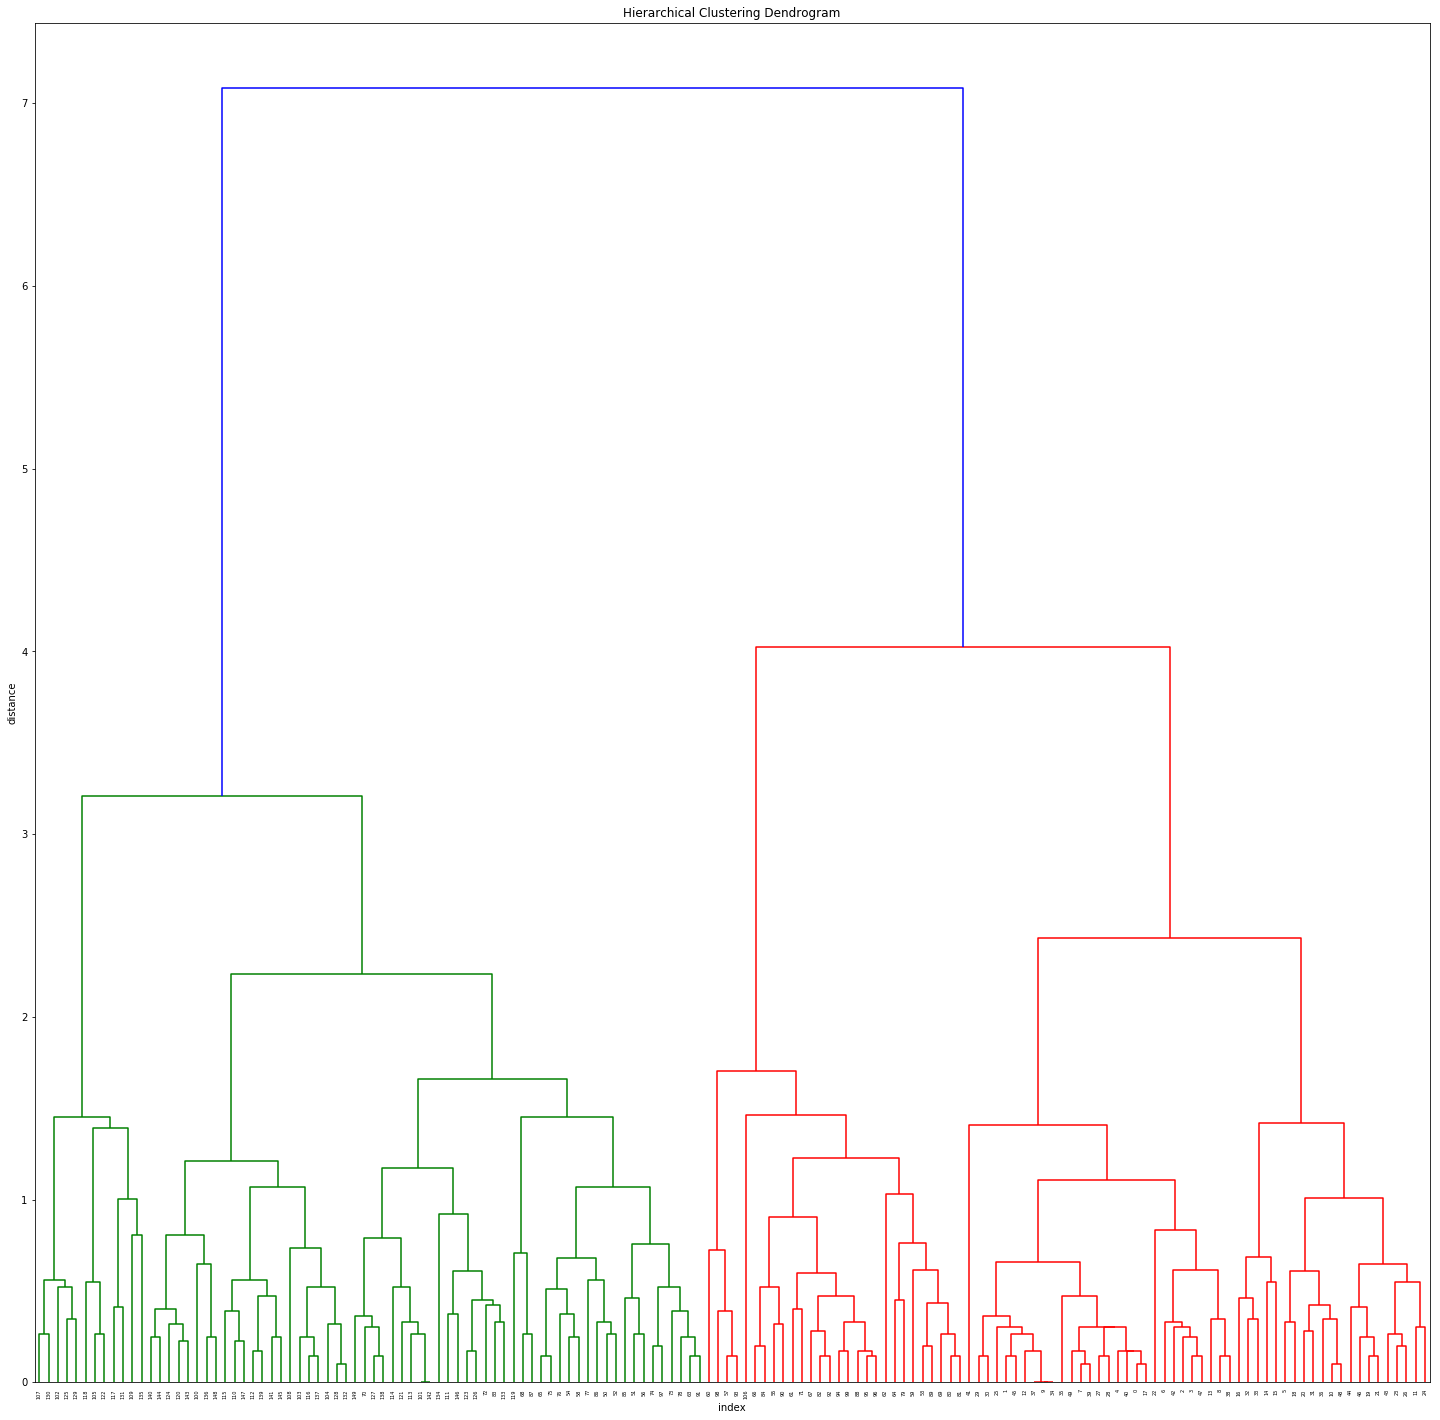

In [21]:
Z = linkage(X, 'complete')
fig = plt.figure(figsize=(25, 25))
dn = dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')

Cophenetic Correlation Coefficient :  0.7271703099916069


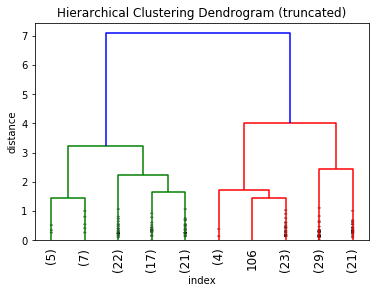

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 1 2 1 1
 1 1 1 1 1 2 2 2 2 1 2 1 1 1 2 2 2 1 2 2 2 2 2 1 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
ARI -  complete linkage : 0.64225125183629
rand index complete linkage : 0.8367785234899329


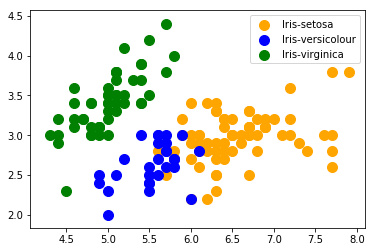

In [22]:
y_mean = hierachy_clustering(Z,X,10,3,3)

## Average Linkage

Text(0,0.5,'distance')

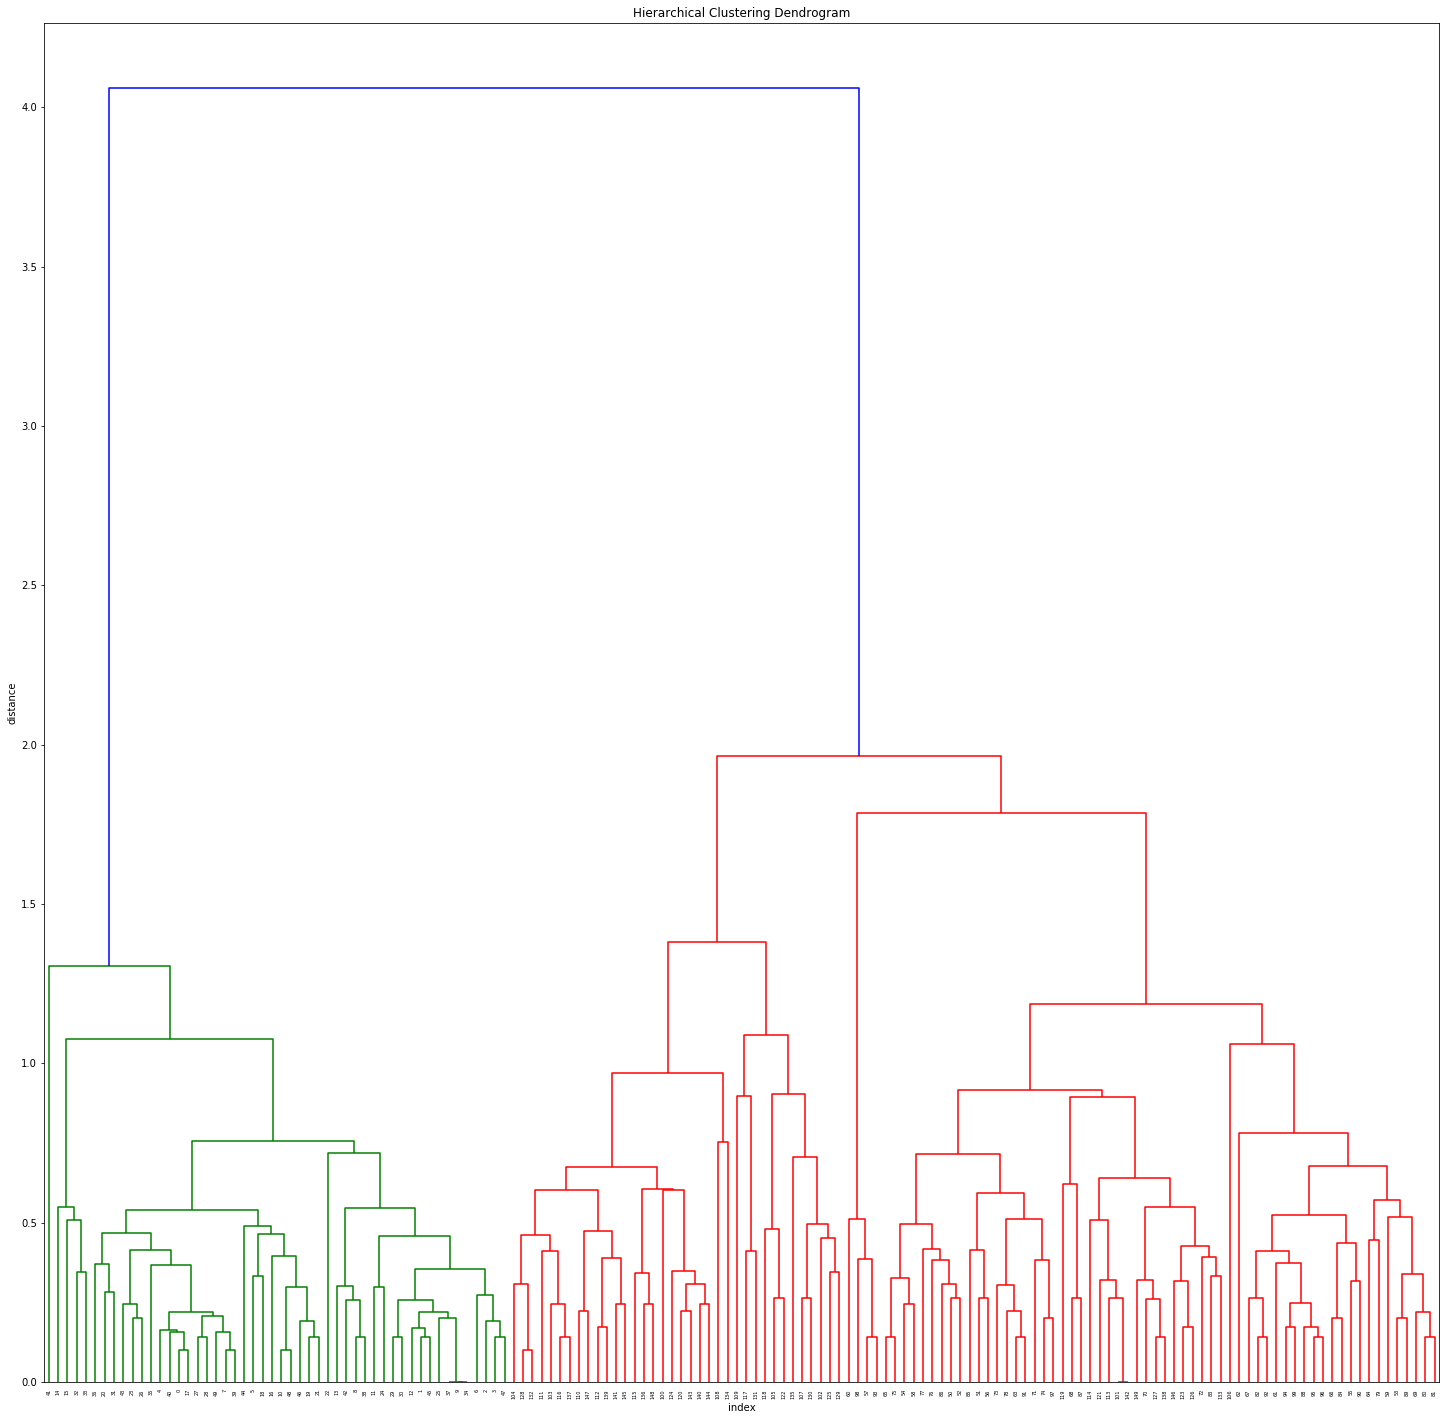

In [23]:
Z = linkage(X, 'average')
fig = plt.figure(figsize=(25, 25))
dn = dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')

Cophenetic Correlation Coefficient :  0.8766966529209113


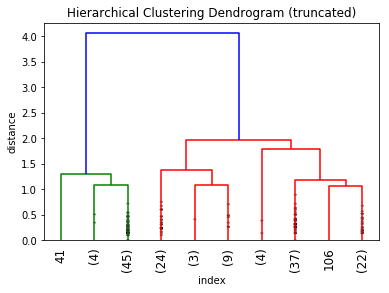

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
 2 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 2 2 2 2 3 2 2 2 3 2 2 2 3 2
 2 3]
ARI -  average linkage : 0.7591987071071522
rand index average linkage : 0.8922595078299776


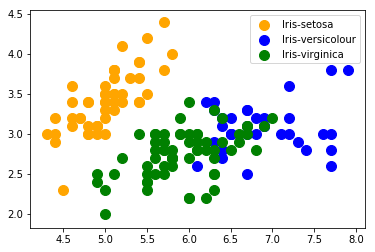

In [24]:
y_mean = hierachy_clustering(Z,X,10,3,2)

## Self - organizing Maps using sompy ##

In [25]:
from time import time
import sompy

In [26]:
mapsize = [8,8]
som = sompy.SOMFactory.build(X,mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='info')

 Training...
 pca_linear_initialization took: 0.004000 seconds
 Rough training...
 radius_ini: 2.000000 , radius_final: 1.000000, trainlen: 13

 epoch: 1 ---> elapsed time:  0.112000, quantization error: 0.805479



maxtrainlen %d inf


 epoch: 2 ---> elapsed time:  0.102000, quantization error: 1.109357

 epoch: 3 ---> elapsed time:  0.103000, quantization error: 0.827168

 epoch: 4 ---> elapsed time:  0.103000, quantization error: 0.684528

 epoch: 5 ---> elapsed time:  0.102000, quantization error: 0.609937

 epoch: 6 ---> elapsed time:  0.103000, quantization error: 0.581144

 epoch: 7 ---> elapsed time:  0.104000, quantization error: 0.561210

 epoch: 8 ---> elapsed time:  0.102000, quantization error: 0.542528

 epoch: 9 ---> elapsed time:  0.102000, quantization error: 0.522137

 epoch: 10 ---> elapsed time:  0.103000, quantization error: 0.502964

 epoch: 11 ---> elapsed time:  0.102000, quantization error: 0.489329

 epoch: 12 ---> elapsed time:  0.102000, quantization error: 0.469538

 epoch: 13 ---> elapsed time:  0.103000, quantization error: 0.444611

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 18

 epoch: 1 ---> elapsed time:  0.106000, quantization error: 0.416866



maxtrainlen %d inf


 epoch: 2 ---> elapsed time:  0.102000, quantization error: 0.412673

 epoch: 3 ---> elapsed time:  0.104000, quantization error: 0.411762

 epoch: 4 ---> elapsed time:  0.102000, quantization error: 0.411339

 epoch: 5 ---> elapsed time:  0.102000, quantization error: 0.411025

 epoch: 6 ---> elapsed time:  0.103000, quantization error: 0.410926

 epoch: 7 ---> elapsed time:  0.103000, quantization error: 0.410425

 epoch: 8 ---> elapsed time:  0.103000, quantization error: 0.410070

 epoch: 9 ---> elapsed time:  0.103000, quantization error: 0.410070

 epoch: 10 ---> elapsed time:  0.102000, quantization error: 0.410070

 epoch: 11 ---> elapsed time:  0.103000, quantization error: 0.410070

 epoch: 12 ---> elapsed time:  0.103000, quantization error: 0.410070

 epoch: 13 ---> elapsed time:  0.103000, quantization error: 0.410070

 epoch: 14 ---> elapsed time:  0.102000, quantization error: 0.410070

 epoch: 15 ---> elapsed time:  0.103000, quantization error: 0.410070

 epoch: 16 ---

/home/vedavikas/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


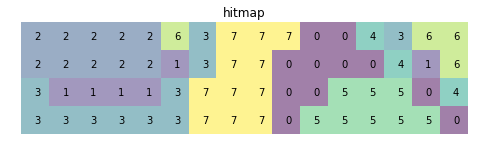

array([[ 0,  0,  0],
       [ 0,  1,  1],
       [ 0,  2,  2],
       [ 0,  3,  3],
       [ 0,  4,  4],
       [ 0,  5,  5],
       [ 0,  6,  6],
       [ 0,  7,  7],
       [ 0,  8,  8],
       [ 0,  9,  9],
       [ 0, 10, 10],
       [ 0, 11, 11],
       [ 0, 12, 12],
       [ 0, 13, 13],
       [ 0, 14, 14],
       [ 0, 15, 15],
       [ 1,  0, 16],
       [ 1,  1, 17],
       [ 1,  2, 18],
       [ 1,  3, 19],
       [ 1,  4, 20],
       [ 1,  5, 21],
       [ 1,  6, 22],
       [ 1,  7, 23],
       [ 1,  8, 24],
       [ 1,  9, 25],
       [ 1, 10, 26],
       [ 1, 11, 27],
       [ 1, 12, 28],
       [ 1, 13, 29],
       [ 1, 14, 30],
       [ 1, 15, 31],
       [ 2,  0, 32],
       [ 2,  1, 33],
       [ 2,  2, 34],
       [ 2,  3, 35],
       [ 2,  4, 36],
       [ 2,  5, 37],
       [ 2,  6, 38],
       [ 2,  7, 39],
       [ 2,  8, 40],
       [ 2,  9, 41],
       [ 2, 10, 42],
       [ 2, 11, 43],
       [ 2, 12, 44],
       [ 2, 13, 45],
       [ 2, 14, 46],
       [ 2, 1

In [27]:
h = sompy.hitmap.HitMapView(8, 8, 'hitmap', text_size=8, show_text=True)
h.show(som)

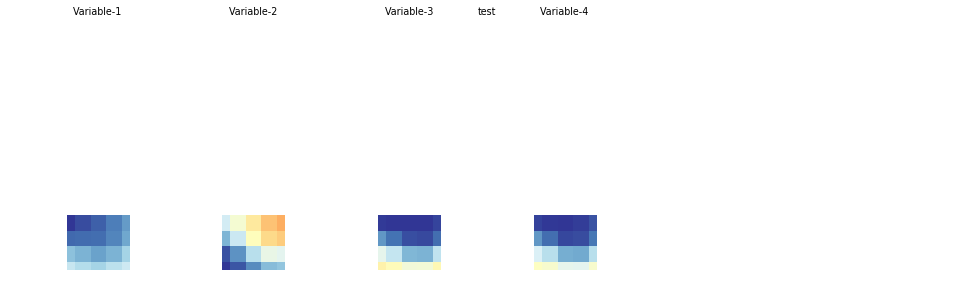

In [28]:
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
v.show(som, what='codebook', which_dim='all', cmap=None, col_sz=6) 

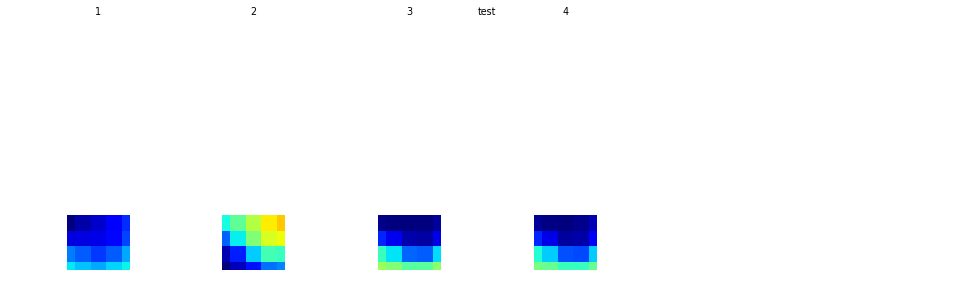

In [29]:
som.component_names = ['1','2','3','4']
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
v.show(som, what='codebook', which_dim='all', cmap='jet', col_sz=6) 

In [30]:
v = sompy.mapview.View2DPacked(2, 2, 'test',text_size=8)  

cl = som.cluster(n_clusters=3)
print(len(cl))

getattr(som, 'cluster_labels')

64


array([0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

/home/vedavikas/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


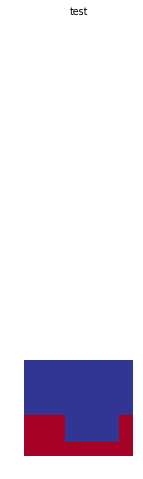

In [31]:
v.show(som, what='cluster')

/home/vedavikas/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


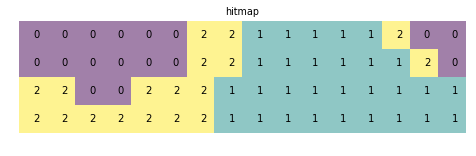

array([[ 0,  0,  0],
       [ 0,  1,  1],
       [ 0,  2,  2],
       [ 0,  3,  3],
       [ 0,  4,  4],
       [ 0,  5,  5],
       [ 0,  6,  6],
       [ 0,  7,  7],
       [ 0,  8,  8],
       [ 0,  9,  9],
       [ 0, 10, 10],
       [ 0, 11, 11],
       [ 0, 12, 12],
       [ 0, 13, 13],
       [ 0, 14, 14],
       [ 0, 15, 15],
       [ 1,  0, 16],
       [ 1,  1, 17],
       [ 1,  2, 18],
       [ 1,  3, 19],
       [ 1,  4, 20],
       [ 1,  5, 21],
       [ 1,  6, 22],
       [ 1,  7, 23],
       [ 1,  8, 24],
       [ 1,  9, 25],
       [ 1, 10, 26],
       [ 1, 11, 27],
       [ 1, 12, 28],
       [ 1, 13, 29],
       [ 1, 14, 30],
       [ 1, 15, 31],
       [ 2,  0, 32],
       [ 2,  1, 33],
       [ 2,  2, 34],
       [ 2,  3, 35],
       [ 2,  4, 36],
       [ 2,  5, 37],
       [ 2,  6, 38],
       [ 2,  7, 39],
       [ 2,  8, 40],
       [ 2,  9, 41],
       [ 2, 10, 42],
       [ 2, 11, 43],
       [ 2, 12, 44],
       [ 2, 13, 45],
       [ 2, 14, 46],
       [ 2, 1

In [32]:
h = sompy.hitmap.HitMapView(8, 8, 'hitmap', text_size=8, show_text=True)
h.show(som)

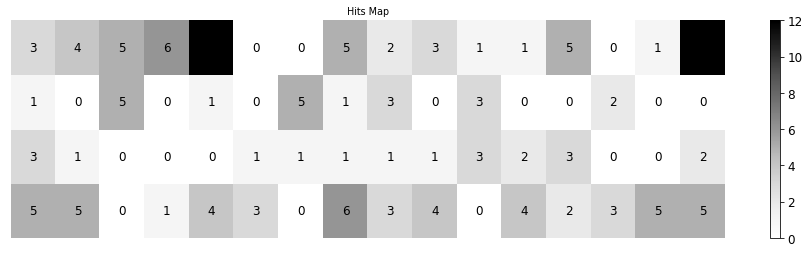

In [33]:
from sompy.visualization.bmuhits import BmuHitsView

vhts  = BmuHitsView(4,4,"Hits Map",text_size=12)
vhts.show(som, anotate=True, onlyzeros=False, labelsize=12, cmap="Greys", logaritmic=False)

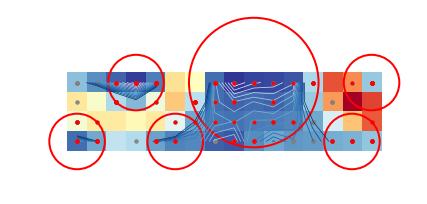

In [34]:
u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=True)

In [35]:
topographic_error = som.calculate_topographic_error()
quantization_error = np.mean(som._bmu[1])
print ("Topographic error = %s; Quantization error = %s" % (topographic_error, quantization_error))

Topographic error = 0.0; Quantization error = 0.4100701403891987


In [36]:
print(som._bmu[1])

[0.26881617 0.25066164 0.16147825 0.19104572 0.47992099 0.08156442
 0.43454162 0.14941926 0.28385343 0.24892979 0.47400308 0.22299968
 0.22615601 0.53465774 0.64724308 1.25799655 0.22146178 0.22813361
 0.38693942 0.42397025 0.41760012 0.56718632 0.76078934 0.15427465
 0.32088729 0.32191689 0.15956966 0.29030019 0.22507349 0.15553992
 0.1353232  0.40582331 0.65393012 0.78540004 0.24892979 0.27617047
 0.58470529 0.24892979 0.36145722 0.15191103 0.27543347 1.12495511
 0.50369874 0.44640807 0.43531602 0.18455617 0.45448226 0.25592196
 0.48878541 0.15550052 0.42130348 0.30082734 0.27772271 0.17123972
 0.32832621 0.22237804 0.33179461 0.47934783 0.46237142 0.58408264
 0.97735877 0.2785366  0.64499173 0.14441946 0.20533545 0.20700149
 0.36851247 0.34978844 0.94801045 0.27510447 0.61041167 0.42071007
 0.67989321 0.44153594 0.41632043 0.37046046 0.54715813 0.1464916
 0.10035072 0.3164283  0.09191009 0.23068059 0.24535456 0.21241905
 0.50625824 0.33376558 0.05755129 0.92054589 0.15147467 0.29563

In [37]:
bmus = som.project_data(X)
print(bmus)
cl_data = cl[bmus]
print(cl_data)


[ 4  1  2  1  4 15  3  3  0 18 15  3  1  0 15 15 15  4 14 15  4 15  3 20
  3 18  4  4  4  2 18  4 15 15 18  2  4 18  0  4  4 16  2  4 15  1 15  2
 15  3 12 29 12 48  9 38 29 32  9 52 32  7 48  8 37 12 22 52 48 49 47  7
 55  7  8 12 10 11 23 51 49 49 52 55 22 47 12 48 22 49 53  7 52 32 53 22
 22  7 33 53 63 55 43 41 42 60 49 59 57 61 63 57 42 55 56 63 26 61 59 48
 62 39 59 56 62 44 40 24 57 43 59 61 57  9 55 60 63 26 24 44 62 44 55 62
 62 42 56 26 63 24]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 2 2 1 2 1 2
 1 1 1 1 2 2 2 2 2 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [39]:
print('adj rand index',adjusted_rand_score(Y,cl_data))
print('rand index',rand_index(Y,cl_data))

adj rand index 0.6928081985331055
rand index 0.8622818791946308
